<a href="https://colab.research.google.com/github/praveenkumarannapareddy23/Data-analysis/blob/main/sentiment_analysis_and_topic_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Extraction

In [1]:
pip install snscrape

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 2.1 MB/s eta 0:00:00


In [2]:
import snscrape.modules.twitter as sntwitter
import pandas as pd

In [3]:
query = "ATMANIRBHAR BHARAT ABHIYAN"
tweets=[]
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
  if len(tweets)==500:
    break
  else:
    tweets.append(tweet.content)
print(len(tweets))

ERROR:snscrape.base:Error retrieving https://twitter.com/search?f=live&lang=en&q=ATMANIRBHAR+BHARAT+ABHIYAN&src=spelling_expansion_revert_click: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=ATMANIRBHAR+BHARAT+ABHIYAN&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1006)')))"))
CRITICAL:snscrape.base:4 requests to https://twitter.com/search?f=live&lang=en&q=ATMANIRBHAR+BHARAT+ABHIYAN&src=spelling_expansion_revert_click failed, giving up.
CRITICAL:snscrape.base:Errors: SSLError(MaxRetryError("HTTPSConnectionPool(host='twitter.com', port=443): Max retries exceeded with url: /search?f=live&lang=en&q=ATMANIRBHAR+BHARAT+ABHIYAN&src=spelling_expansion_revert_click (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify fai

ScraperException: 4 requests to https://twitter.com/search?f=live&lang=en&q=ATMANIRBHAR+BHARAT+ABHIYAN&src=spelling_expansion_revert_click failed, giving up.

In [4]:
import pandas as pd
df = pd.DataFrame(tweets, columns=['Tweets'])
df.head()


,Tweets


In [5]:
df.to_csv('data.csv')

#Data Cleaning
Noisy data :

Emojis

Hashtags

Mentions

URL's

Punctuations

Stopwords

These noisy data are removed by using regex in python



In [6]:
import re
def remove_emojis(tweets):
    l=[]
    h=[]
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    for i in tweets:
      m=re.sub(r'http\S+', '',i) #remove links
      k=re.sub(r'@\S+' , '',m) #remove mentions
      n=re.sub(r'#\S+' , '',k) #remove hashtags
      z=re.sub(r'\n\d','',n) #remove delimeters
      l.append(re.sub(emoj, '', z)) #remove emojis
    return l


To remove Punctuations and Stopwords use the nltk in NLP

In [7]:
import nltk
nltk.download("punkt")
nltk.download("wordnet")
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
for i in tweets:
  print(i)

Text after removing noisy data

In [9]:
clean_text=remove_emojis(tweets)
for i in clean_text:
  print(i)

Removing punctuations and stopwords in noisy text

In [10]:
def remove_punctuation(sentence):
  for i in sentence:
    if i in string.punctuation:
      sentence = sentence.replace(i, "")
  return sentence
def remove_stopwords(sentence):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(example_sent)
  filtered_sentence = []
  for w in word_tokens:
    if w not in stop_words:
      filtered_sentence.append(w)
  return filtered_sentence
filter_text=[]
for i in clean_text:
  example_sent = remove_punctuation(i)
  example_sent = " ".join(remove_stopwords(example_sent))
  print(example_sent)
  filter_text.append(example_sent)



##Sentiment Analysis

In [11]:
pip install transformers

The resultant tweets contain all the retweets. Removing all the retweets

In [12]:
set_text=set(filter_text)
final_text=[]
for i in set_text:
  if len(i)==0:
    pass
  else:
    final_text.append(i)


Installing VADERSENTIMENT model for sentiment analysis

In [13]:
pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
positive=[]
negative=[]
neutral=[]
sid_obj = SentimentIntensityAnalyzer()
def sentiment_scores(sentence):
  sentiment_dict = sid_obj.polarity_scores(sentence)
  if sentiment_dict['compound'] >= 0.05 :
    positive.append(sentence)
  elif sentiment_dict['compound'] <= - 0.05 :
    negative.append(sentence)
  else :
    neutral.append(sentence)
for i in final_text:
  sentence = i
  sentiment_scores(sentence)


Percentages of all the labeled classes

In [15]:
len_pos=len(positive)
len_neg=len(negative)
len_neut=len(neutral)

In [18]:
pos_perc=(len_pos/(len_pos+len_neg+len_neut))*100
neg_perc=(len_neg/(len_pos+len_neg+len_neut))*100
neut_perc=(len_neut/(len_pos+len_neg+len_neut))*100
print("Positive tweets : ",pos_perc)
print("Negative tweets : ",neg_perc)
print("Neutral tweets : ",neut_perc)


ZeroDivisionError: division by zero

In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Plotting the percentages of positive negative and neutral tweets

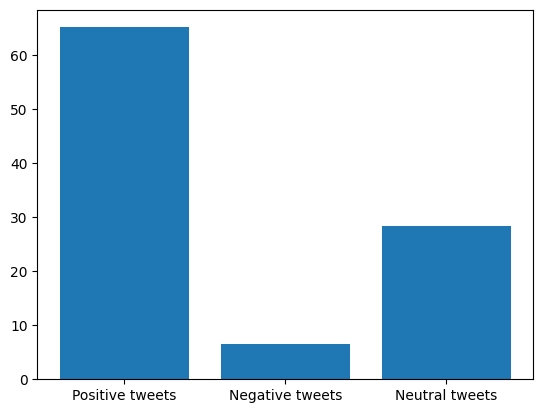

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array(["Positive tweets","Negative tweets","Neutral tweets"])
y = [pos_perc,neg_perc,neut_perc]
plt.bar(x,y)
plt.show()

##Summarization

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
punctuation = punctuation + '\n'
from heapq import nlargest

In [ ]:
stopwords = list(STOP_WORDS)
nlp = spacy.load('en_core_web_sm')

In [ ]:
def summ(text):
  doc = nlp(text)
  tokens = [token.text for token in doc]
  word_frequencies = {}
  for word in doc:
    if word.text.lower() not in stopwords:
        if word.text.lower() not in punctuation:
            if word.text not in word_frequencies.keys():
                word_frequencies[word.text] = 1
            else:
                word_frequencies[word.text] += 1
  max_frequency = max(word_frequencies.values())
  for word in word_frequencies.keys():
    word_frequencies[word] = word_frequencies[word]/max_frequency
  sentence_tokens = [sent for sent in doc.sents]
  sentence_scores = {}
  for sent in sentence_tokens:
    for word in sent:
        if word.text.lower() in word_frequencies.keys():
            if sent not in sentence_scores.keys():
                sentence_scores[sent] = word_frequencies[word.text.lower()]
            else:
                sentence_scores[sent] += word_frequencies[word.text.lower()]
  select_length = int(len(sentence_tokens)*0.1)
  summary = nlargest(select_length, sentence_scores, key = sentence_scores.get)
  final_summary = [word.text for word in summary]
  summary = ' '.join(final_summary)
  return summary

In [ ]:
len(positive)

228

In [ ]:
len(negative)

23

In [ ]:
len(neutral)

99

In [ ]:
n=len(positive)//2
poe=[]
for i in range(n):
  poe.append(positive[i])
lo="".join(poe)
k=summ(lo)

In [ ]:
poe=[]
for i in range(n+1,len(positive)):
  poe.append(positive[i])
lo="".join(poe)
p=summ(lo)


In [ ]:
print(k+p)


And Infrastructure Read HereBesides generating additional income farmers job creation provide fillip rural economy At Praj feel proud actively contribute Atmanirbhar Bharat Abhiyan Jai Hind 44It improve mens imagination power Innovative creative thinking promote atmanirbhar bharat abhiyanFirst aircraft purchase agreement signed GIFT International Finance Tec citybased Vman aviation amp amp Airbus Helicopters Atmanirbhar Bharat Abhiyan Ministry Civil AviationANIIn respect Atmanirbhar Bharat Abhiyan conservation concerns mustard sunflower land efficient solution per Our World Data Circular economies healthy local foods great forex must addressedMake In India Atmanirbhar Bharat Abhiyan two initiatives spearheaded governments effort bring change Indias entrepreneurship mindset – easing regulations announcing grants upcoming MSMEsOn 06102022 CGST amp CEx Palghar Commissionerate celebrated Gandhi Jayanti Swachh Bharat Abhiyan Atmanirbhar Bharat part celebration On occasion Jute Bags distribu

In [ ]:
lo="".join(negative)
j=summ(lo)
print(j)


I dont know Rahul Gandhi Led congress fooling peopleIts typical standard political scam get Atmanirbhar Bharat AbhiyanAtmanirbhar means selfreliant On May 12 Prime Minister Narendra Modi announced address nation economic package Rs 20 trillion tide coronavirus crisis Atmanirbhar Bharat AbhiyanI write Atmanirbhar Bharat Abhiyan mostly restricting importsIt wrong say Atmanirbhar Bharat Abhiyan biggest scam time No one knows money goesLicypriya Kangujam joins various hashtag trends NEET exams unemployment mocking Atmanirbhar Bharat abhiyan like trueblue eaandolanjeeviplease pay attention thisthis destroying Indias start atmanirbhar bharat abhiyanthis need investigation action chinese container coming India label made IndiaThe bonhomie lose And ensuring participating Atmanirbhar Bharat abhiyandeveloped sustainable technology tackle menace ewaste Adopted method 3step process amp developed technology cater need Smart Cities Swachh Bharat Abhiyan amp Atmanirbhar Bharat initiativesHe also stre

In [ ]:
n=len(neutral)//2
poe=[]
for i in range(n):
  poe.append(neutral[i])
lo="".join(poe)
u=summ(lo)

In [ ]:
poe=[]
for i in range(n+1,len(neutral)):
  poe.append(neutral[i])
lo="".join(poe)
v=summ(lo)


In [ ]:
print(u+v)

Where 20 lakh atmanirbhar package 0 lakh crore equivalent 10 Indias GDP Atmanirbhar Bharat Abhiyan announced fm MSMEs telangana small scale industrialist couldnt able see whole indiaKSG BLOGS Atmanirbhar Bharat Abhiyan Read MoreFighting Stigma IN Nontax benefits MSMEs 3 years even reclassification This decision taken due deliberations MSME stakeholders line Atmanirbhar Bharat Abhiyan ministry said statement…Department Biotechnologys tableau glides Rajpath depicting theme Atmanirbhar Bharat Abhiyan COVIDNew initiativeInaugural function skill development training Atmanirbhar Bharat Abhiyan SubjectTractor driving tribal farm women licenseDrDineshkumar KapadiyaIASDDOTapi SmtSujata MajmudarIPS SP Tapi remained presentAtmanirbhar Bharat Abhiyan Key Facts Objectives General Concept And More DetailsNDCS RADIO Atmanirbhar Bharat Abhiyan Vocal For Local All That You Need TO Know About Atmanirbhar Bharat AbhiyanAtmanirbhar Bharat Abhiyan Atmanirbhar Bharat काशी की जूट वॉरियर से मिलिए तैयार कर रही

In [ ]:
import pandas as pd
df1 = pd.DataFrame(final_text, columns=['Tweet'])
df1.head()

,Tweet
0,Where 20 lakh atmanirbhar package 0 lakh crore...
1,In message Shri Dharmendra Pradhan Ji mentione...
2,There many benefits Atmanirbhar Bharat Abhiyan...
3,KSG BLOGS Atmanirbhar Bharat Abhiyan Read More
4,Indian Army inaugurated firstever twostorey 3D...


In [ ]:
df1.to_csv('tweets.csv')

###WordCloud

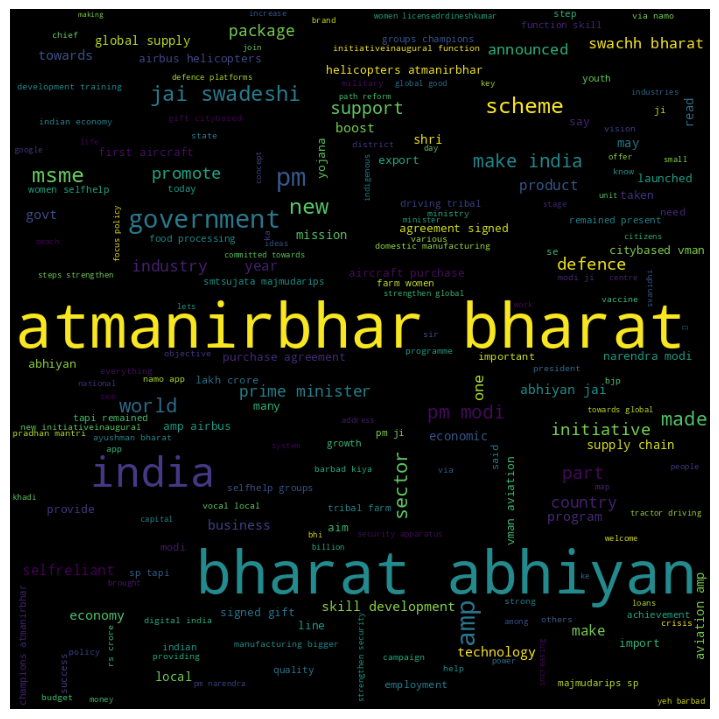

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv(r"tweets.csv", encoding ="UTF-8")
comment_words = ''
stopwords = set(STOPWORDS)
for val in df.Tweet:
	val = str(val)
	tokens = val.split()
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='black',
				stopwords = stopwords,
				min_font_size = 8).generate(comment_words)
plt.figure(figsize = (7, 7), facecolor = "white")
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

###Topic Modelling

Installing BERTTOPIC model to do Topic Modelling

In [ ]:
pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 12.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 71.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 78.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3580445 sha256=42ab28de92d8bc3b073357bd6db24a5e01f570ffc1837055649f87c478eb464

In [ ]:
from bertopic import BERTopic
import json
import pandas as pd


In [ ]:
df = pd.read_csv("tweets.csv")

In [ ]:
df.head(5)

,Unnamed: 0,Tweet
0,0,Where 20 lakh atmanirbhar package 0 lakh crore...
1,1,In message Shri Dharmendra Pradhan Ji mentione...
2,2,There many benefits Atmanirbhar Bharat Abhiyan...
3,3,KSG BLOGS Atmanirbhar Bharat Abhiyan Read More
4,4,Indian Army inaugurated firstever twostorey 3D...


In [ ]:
df.groupby('Tweet').describe()

Unnamed: 0             \
                                                        count   mean std   
Tweet                                                                      
1 Gather Ideas Resources create systems Run sys...        1.0   85.0 NaN   
1 Make India Swachh Bharat Abhiyan Jan Dhan Yoj...        1.0   96.0 NaN   
1 Make india Swachh bharat abhiyan Removing art...        1.0  324.0 NaN   
20 Years Good Governance Atmanirbhar Bharat Abh...        1.0  292.0 NaN   
29 August 2022 Supertech Twin Towers Atmanirbha...        1.0   94.0 NaN   
...                                                       ...    ...  ..   
‘ Atmanirbhar Bharat Abhiyan aims revival MSMEs ’         1.0   44.0 NaN   
“ Atmanirbhar Bharat Abhiyan ”                            1.0   58.0 NaN   
“ Laser Metal 3D Printing Facility ” sterling C...        1.0  124.0 NaN   
“ So view kindly requested make ‘ AICTE list Bo...        1.0  297.0 NaN   
“ We taken steps strengthen security apparatus ...        1.0  126.0 NaN   

                                                                         \
                                                      min    25%    50%   
Tweet                                                                     
1 Gather Ideas Resources create systems Run sys...   85.0   85.0   85.0   
1 Make India Swachh Bharat Abhiyan Jan Dhan Yoj...   96.0   96.0   96.0   
1 Make india Swachh bharat abhiyan Removing art...  324.0  324.0  324.0   
20 Years Good Governance Atmanirbhar Bharat Abh...  292.0  292.0  292.0   
29 August 2022 Supertech Twin Towers Atmanirbha...   94.0   94.0   94.0   
...                                                   ...    ...    ...   
‘ Atmanirbhar Bharat Abhiyan aims revival MSMEs ’    44.0   44.0   44.0   
“ Atmanirbhar Bharat Abhiyan ”                       58.0   58.0   58.0   
“ Laser Metal 3D Printing Facility ” sterling C...  124.0  124.0  124.0   
“ So view kindly requested make ‘ AICTE list Bo...  297.0  297.0  297.0   
“ We taken steps strengthen security apparatus ...  126.0  126.0  126.0   

                                                                  
                                                      75%    max  
Tweet                                                             
1 Gather Ideas Resources create systems Run sys...   85.0   85.0  
1 Make India Swachh Bharat Abhiyan Jan Dhan Yoj...   96.0   96.0  
1 Make india Swachh bharat abhiyan Removing art...  324.0  324.0  
20 Years Good Governance Atmanirbhar Bharat Abh...  292.0  292.0  
29 August 2022 Supertech Twin Towers Atmanirbha...   94.0   94.0  
...                                                   ...    ...  
‘ Atmanirbhar Bharat Abhiyan aims revival MSMEs ’    44.0   44.0  
“ Atmanirbhar Bharat Abhiyan ”                       58.0   58.0  
“ Laser Metal 3D Printing Facility ” sterling C...  124.0  124.0  
“ So view kindly requested make ‘ AICTE list Bo...  297.0  297.0  
“ We taken steps strengthen security apparatus ...  126.0  126.0  

[350 rows x 8 columns]

In [ ]:
topic_model = BERTopic(embedding_model="all-MiniLM-L6-v2")



In [ ]:
topics, probs = topic_model.fit_transform(final_text)


In [ ]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,145,-1_bharat_atmanirbhar_abhiyan_pm
1,0,64,0_atmanirbhar_bharat_abhiyan_kiya
2,1,27,1_bharat_infrastructure_industry_atmanirbhar
3,2,25,2_msmes_msme_innovation_atmanirbhar
4,3,23,3_global_chain_supply_india
5,4,16,4_defence_manufacturing_domestic_military
6,5,16,5_india_digital_ki_bharat
7,6,12,6_vaccine_maitri_jai_swadeshi
8,7,11,7_swadeshi_jai_in_made
9,8,11,8_scheme_processing_food_pli


In [ ]:
topic_model.get_topic(topic=0)


[('atmanirbhar', 0.091060829396348),
 ('bharat', 0.0897062951139141),
 ('abhiyan', 0.08527118281502681),
 ('kiya', 0.03820138835691278),
 ('barbad', 0.0327440471630681),
 ('yeh', 0.0327440471630681),
 ('sir', 0.02579975738198808),
 ('आत', 0.02448856425560021),
 ('today', 0.02256062371886148),
 ('se', 0.021829364775378734)]

In [ ]:
topic_model.visualize_barchart()

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
topic_model.visualize_hierarchy()

In [ ]:
pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from textblob import TextBlob
pol=[]
sun=[]
for i in tweets:
  res = TextBlob(i)
  k=res.sentiment
  sun.append(round(k[1],2))
  p=res.sentiment.polarity
  pol.append(round(p,2))

In [ ]:
data=pd.read_csv("data.csv")
data.head()

,Unnamed: 0,Tweets
0,0,"#LIVE | PM Modi inaugurates Rozgar Mela. Says,..."
1,1,#BREAKING | PM Modi inaugurates Rozgar Mela. S...
2,2,"'Banarasi Paan, Langda mango from Kashi make i..."
3,3,@narendramodi The GOI has launched the Atmanir...
4,4,Scheme is a part of the Atmanirbhar Bharat Abh...


In [ ]:
data['Polarity']=pol
data['Subjectivity']=sun


In [ ]:
data.head(12)

,Unnamed: 0,Tweets,Polarity,Subjectivity
0,0,"#LIVE | PM Modi inaugurates Rozgar Mela. Says,...",0.09,0.32
1,1,#BREAKING | PM Modi inaugurates Rozgar Mela. S...,0.04,0.14
2,2,"'Banarasi Paan, Langda mango from Kashi make i...",0.00,0.00
3,3,@narendramodi The GOI has launched the Atmanir...,-0.21,0.28
4,4,Scheme is a part of the Atmanirbhar Bharat Abh...,0.00,0.00
5,5,PM SVANidhi\nThe Ministry of Housing and Urban...,0.10,0.10
6,6,The Ministry of Housing and Urban Affairs (MoH...,0.10,0.10
7,7,A warm welcome to Prime Minister Shri @narendr...,0.59,0.79
8,8,The government has launched several initiative...,0.00,0.33
9,9,@BJP4Karnataka #9yearsofnda #9X9\nSwachh Bhara...,0.00,0.00


In [ ]:
data.shape

(500, 4)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(data[['Polarity','Subjectivity']])
df_scale = pd.DataFrame(scale, columns = ['Polarity','Subjectivity']);
df_scale.head(5),


(   Polarity  Subjectivity
 0  0.488764          0.32
 1  0.460674          0.14
 2  0.438202          0.00
 3  0.320225          0.28
 4  0.438202          0.00,)

In [ ]:
K=range(1,20)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k)
    kmeans=kmeans.fit(df_scale)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

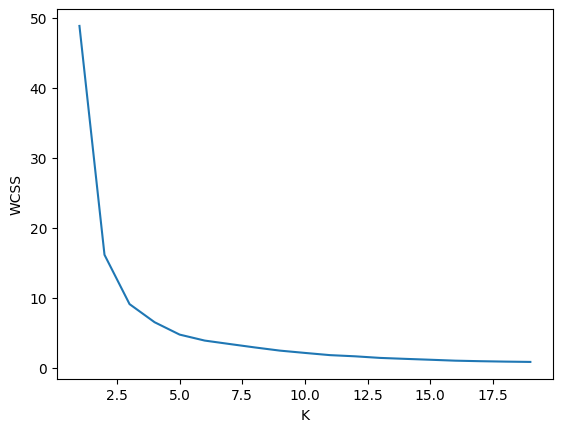

In [ ]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(K,wss)

In [ ]:
km=KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_scale[['Polarity','Subjectivity']])
y_predicted

array([2, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 2, 0, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 1, 1, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 2, 1, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 1, 2, 2, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 2, 1, 1, 2, 1, 0, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2,

<Axes: xlabel='Polarity', ylabel='Subjectivity'>

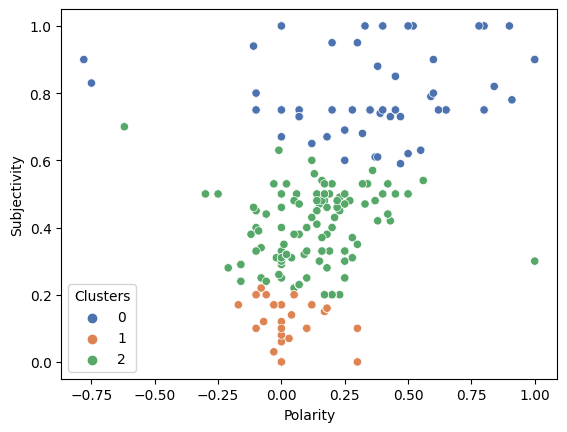

In [ ]:
data['Clusters'] = km.labels_
sns.scatterplot(x="Polarity", y="Subjectivity",hue = 'Clusters',  data=data,palette='deep')


In [ ]:
data.head(10)

,Unnamed: 0,Tweets,Polarity,Subjectivity,Clusters
0,0,"#LIVE | PM Modi inaugurates Rozgar Mela. Says,...",0.09,0.32,2
1,1,#BREAKING | PM Modi inaugurates Rozgar Mela. S...,0.04,0.14,1
2,2,"'Banarasi Paan, Langda mango from Kashi make i...",0.00,0.00,1
3,3,@narendramodi The GOI has launched the Atmanir...,-0.21,0.28,2
4,4,Scheme is a part of the Atmanirbhar Bharat Abh...,0.00,0.00,1
5,5,PM SVANidhi\nThe Ministry of Housing and Urban...,0.10,0.10,1
6,6,The Ministry of Housing and Urban Affairs (MoH...,0.10,0.10,1
7,7,A warm welcome to Prime Minister Shri @narendr...,0.59,0.79,0
8,8,The government has launched several initiative...,0.00,0.33,2
9,9,@BJP4Karnataka #9yearsofnda #9X9\nSwachh Bhara...,0.00,0.00,1


In [ ]:
data['Clusters'].value_counts()

1    257
2    173
0     70
Name: Clusters, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
del data['Tweets']
X=data.drop('Clusters',axis=1).values
y = data['Clusters'].values

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

In [ ]:
model.score(X_train, y_train)

0.965

In [ ]:
model.score(X_test, y_test)

0.97

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 7,  0,  1],
       [ 0, 50,  2],
       [ 0,  0, 40]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93         8
           1       1.00      0.96      0.98        52
           2       0.93      1.00      0.96        40

    accuracy                           0.97       100
   macro avg       0.98      0.95      0.96       100
weighted avg       0.97      0.97      0.97       100

